In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-scores-and-betting-data/nfl_stadiums.csv
/kaggle/input/nfl-scores-and-betting-data/nfl_teams.csv
/kaggle/input/nfl-scores-and-betting-data/spreadspoke_scores.csv
/kaggle/input/nfl-scores-and-betting-data/spreadspoke.R


Some of the default packages that will be implemented throughout the Python script. The main focus of my particular script will really be just to look at mainly the the pandas package and gain some experience with data processing.

In [2]:
# This just reads in the spreadspoke_scores.csv file

games = pd.read_csv("../input/nfl-scores-and-betting-data/spreadspoke_scores.csv")

In [3]:
# This is just a good command to check that the data file has been read in.
# All this command does is display the first 5 rows of a file as it has been
# initiated with default parameters.

#games.head()

In [4]:
# Here we are essentially using this line to allow us to only work with games that were schedule after 2009.

games_2010s = games[ games.schedule_season > 2009]

# We use this line just to double check that it is working by printing out the first five lines of the 2010 games.

#games_2010s.head()

In [5]:
# This command outputs the number of games played in each weather detail. Useful as the goal of this project is to determine how weather effects football games.
# So it is a useful command to just give us a preview of the type of data set that we will be working with.

games_2010s.groupby('weather_detail').size()

weather_detail
DOME                    802
DOME (Open Roof)         56
Fog                      25
Rain                    101
Rain | Fog               18
Snow                     13
Snow | Fog                5
Snow | Freezing Rain      1
dtype: int64

In [6]:
# This is just some starter code syntax for building scatterplots in the pandas environment.

#games_2010s.plot(kind = 'scatter', x = 'score_away', y = 'score_home')

In [7]:
# This allows us to create a new column within the csv that allows us to see the total points score on both sides for each football game.

games_2010s["total_pts"] = games_2010s.score_home + games_2010s.score_away

# This command is used to double check that the csv now has a total points column.

games_2010s

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,total_pts
10008,9/9/2010,2010,1,False,New Orleans Saints,14,9,Minnesota Vikings,NO,-5.0,49.5,Louisiana Superdome,False,72.0,0.0,NaN,DOME,23
10009,9/12/2010,2010,1,False,Buffalo Bills,10,15,Miami Dolphins,MIA,-3.0,39,Ralph Wilson Stadium,False,64.0,7.0,81.0,NaN,25
10010,9/12/2010,2010,1,False,Chicago Bears,19,14,Detroit Lions,CHI,-6.5,45,Soldier Field,False,75.0,1.0,45.0,NaN,33
10011,9/12/2010,2010,1,False,Houston Texans,34,24,Indianapolis Colts,IND,-1.0,48,Reliant Stadium,False,89.0,5.0,NaN,DOME (Open Roof),58
10012,9/12/2010,2010,1,False,Jacksonville Jaguars,24,17,Denver Broncos,JAX,-3.0,41.5,EverBank Field,False,91.0,1.0,67.0,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13214,1/9/2022,2021,18,False,Los Angeles Rams,24,27,San Francisco 49ers,SF,-3.5,46.5,SoFi Stadium,False,72.0,0.0,NaN,DOME,51
13215,1/9/2022,2021,18,False,Miami Dolphins,33,24,New England Patriots,NE,-6.0,41,Hard Rock Stadium,False,75.0,8.0,79.0,NaN,57
13216,1/9/2022,2021,18,False,Minnesota Vikings,31,17,Chicago Bears,MIN,-3.5,44.5,U.S. Bank Stadium,False,72.0,0.0,NaN,DOME,48
13217,1/9/2022,2021,18,False,New York Giants,7,22,Washington Football Team,WAS,-6.0,36,MetLife Stadium,False,38.0,0.0,64.0,NaN,29


<AxesSubplot:xlabel='weather_wind_mph', ylabel='total_pts'>

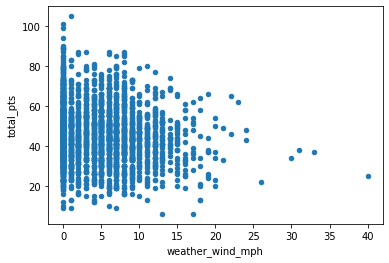

In [8]:
# This plot compares the total points variable against the wind speed variable. As we can see from the scatterplot below there seems to be a high 
# correlation between wind speed and points per game. This scatter plot helps to prove that the lower the wind speed, the more points that are able
# to be scored per game.

games_2010s.plot(kind = 'scatter', x = 'weather_wind_mph', y = 'total_pts')

<AxesSubplot:xlabel='weather_temperature', ylabel='total_pts'>

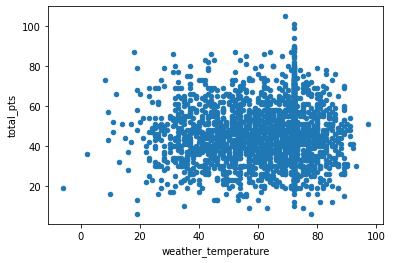

In [9]:
# In this plot we see that we can't real make any conclusions out of it as the total pts per game seem to be relative regardless of temperature.
# Thus, it is fair to say that temperature doesn't really effect the amount of points that are scored during football games.

games_2010s.plot(kind = 'scatter', x = 'weather_temperature', y = 'total_pts')

<AxesSubplot:xlabel='weather_humidity', ylabel='total_pts'>

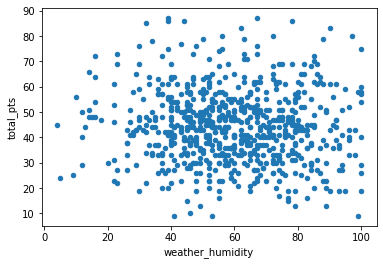

In [10]:
# Here we see that regardless of the humidity the amount of points scored per game still seems to be a bit scattered. Thus, it may also be fair
# to say that humidity doesn't really effect the total points scored during a football game.

games_2010s.plot(kind = 'scatter', x = 'weather_humidity', y = 'total_pts')

In [11]:
# In the given scores csv we get a weather detail column which is nice, however, what if we wanted to see the difference in pts in games when just generally 
# outside vs. inside. Well this function allows us to do so by determining if the game is played within a dome or not. Technically even though the roof is 
# open I still consider the game played indoors just because at the end of the day it is still being played within a dome.

def indoor_outdoor_func(df):
    
    if df['weather_detail'] == 'DOME':
        return 'Indoors'
    elif df['weather_detail'] == 'DOME (OPEN ROOF)':
        return 'Indoors'
    else:
        return 'Outdoors'

# This line allows us to add a new indoor/outdoor column to our already exisiting csv file.

games_2010s['indoor_outdoor'] = games_2010s.apply(indoor_outdoor_func, axis=1)

# This command is just to simply check that the new column is outputting in the csv file appropriately.

games_2010s

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,total_pts,indoor_outdoor
10008,9/9/2010,2010,1,False,New Orleans Saints,14,9,Minnesota Vikings,NO,-5.0,49.5,Louisiana Superdome,False,72.0,0.0,NaN,DOME,23,Indoors
10009,9/12/2010,2010,1,False,Buffalo Bills,10,15,Miami Dolphins,MIA,-3.0,39,Ralph Wilson Stadium,False,64.0,7.0,81.0,NaN,25,Outdoors
10010,9/12/2010,2010,1,False,Chicago Bears,19,14,Detroit Lions,CHI,-6.5,45,Soldier Field,False,75.0,1.0,45.0,NaN,33,Outdoors
10011,9/12/2010,2010,1,False,Houston Texans,34,24,Indianapolis Colts,IND,-1.0,48,Reliant Stadium,False,89.0,5.0,NaN,DOME (Open Roof),58,Outdoors
10012,9/12/2010,2010,1,False,Jacksonville Jaguars,24,17,Denver Broncos,JAX,-3.0,41.5,EverBank Field,False,91.0,1.0,67.0,NaN,41,Outdoors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13214,1/9/2022,2021,18,False,Los Angeles Rams,24,27,San Francisco 49ers,SF,-3.5,46.5,SoFi Stadium,False,72.0,0.0,NaN,DOME,51,Indoors
13215,1/9/2022,2021,18,False,Miami Dolphins,33,24,New England Patriots,NE,-6.0,41,Hard Rock Stadium,False,75.0,8.0,79.0,NaN,57,Outdoors
13216,1/9/2022,2021,18,False,Minnesota Vikings,31,17,Chicago Bears,MIN,-3.5,44.5,U.S. Bank Stadium,False,72.0,0.0,NaN,DOME,48,Indoors
13217,1/9/2022,2021,18,False,New York Giants,7,22,Washington Football Team,WAS,-6.0,36,MetLife Stadium,False,38.0,0.0,64.0,NaN,29,Outdoors


<AxesSubplot:ylabel='indoor_outdoor'>

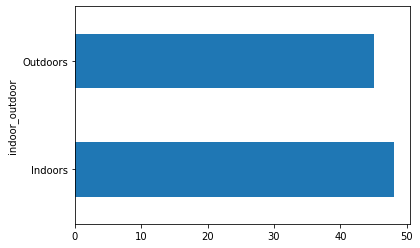

In [12]:
# .barh simply just makes the bar graph horizontal. This graph compares the mean of total pts per game depending
# if the game was played indoors or outdoors.

games_2010s.groupby('indoor_outdoor').total_pts.mean().plot.barh()

<AxesSubplot:ylabel='indoor_outdoor'>

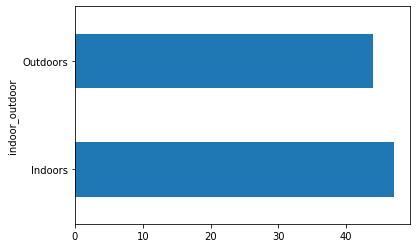

In [13]:
# This graph compares the median of total pts per game depending if the game was played indoors or outdoors.

games_2010s.groupby('indoor_outdoor').total_pts.median().plot.barh()

<AxesSubplot:ylabel='weather_detail'>

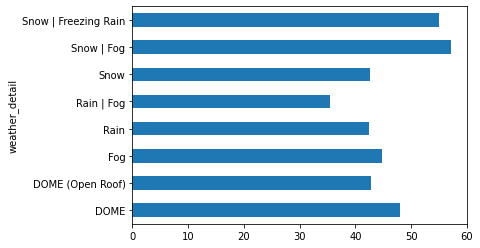

In [14]:
# This graph compares the mean of total pts per game depending on the type of weather during games.

games_2010s.groupby('weather_detail').total_pts.mean().plot.barh()

<AxesSubplot:ylabel='weather_detail'>

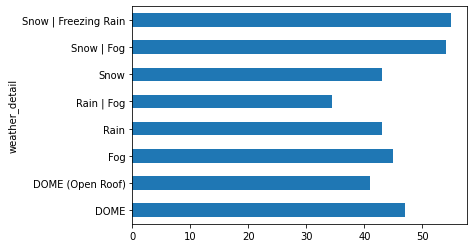

In [15]:
# This graph compares the median of total pts per game depending on the type of weather during games.

games_2010s.groupby('weather_detail').total_pts.median().plot.barh()

So we pretty much have a good idea of what variables of weather may effect the total points of football games
after looking through all these plots.

In [16]:
games_2021s = games[ games.schedule_season > 2020 ]

In [17]:
#games_2021s

In [18]:
games_2021s['total_pts'] = games_2021s.score_home + games_2021s.score_away

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
def ohio_teams_func(df1):
   # FirstEnergy Stadium   Cle
   # Paul Brown Stadium Cin
        if df1['stadium'] == 'FirstEnergy Stadium':
            return 'Cleveland Browns'
        elif df1['stadium'] == 'Paul Brown Stadium':
            return 'Cincinnati Bengals'
        else:
            return 'NULL'

games_2021s['ohio_teams'] = games_2021s.apply(ohio_teams_func, axis = 1)

games_2021s
        

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,total_pts,ohio_teams
12947,9/9/2021,2021,1,False,Tampa Bay Buccaneers,31,29,Dallas Cowboys,TB,-7.5,51.5,Raymond James Stadium,False,NaN,NaN,NaN,NaN,60,NULL
12948,9/12/2021,2021,1,False,Atlanta Falcons,6,32,Philadelphia Eagles,ATL,-3.5,48,Mercedes-Benz Stadium,False,72.0,0.0,NaN,DOME,38,NULL
12949,9/12/2021,2021,1,False,Buffalo Bills,16,23,Pittsburgh Steelers,BUF,-6.5,48.5,Highmark Stadium,False,NaN,NaN,NaN,NaN,39,NULL
12950,9/12/2021,2021,1,False,Carolina Panthers,19,14,New York Jets,CAR,-5.0,44.5,Bank of America Stadium,False,NaN,NaN,NaN,NaN,33,NULL
12951,9/12/2021,2021,1,False,Cincinnati Bengals,27,24,Minnesota Vikings,MIN,-3.0,48,Paul Brown Stadium,False,NaN,NaN,NaN,NaN,51,Cincinnati Bengals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13214,1/9/2022,2021,18,False,Los Angeles Rams,24,27,San Francisco 49ers,SF,-3.5,46.5,SoFi Stadium,False,72.0,0.0,NaN,DOME,51,NULL
13215,1/9/2022,2021,18,False,Miami Dolphins,33,24,New England Patriots,NE,-6.0,41,Hard Rock Stadium,False,75.0,8.0,79.0,NaN,57,NULL
13216,1/9/2022,2021,18,False,Minnesota Vikings,31,17,Chicago Bears,MIN,-3.5,44.5,U.S. Bank Stadium,False,72.0,0.0,NaN,DOME,48,NULL
13217,1/9/2022,2021,18,False,New York Giants,7,22,Washington Football Team,WAS,-6.0,36,MetLife Stadium,False,38.0,0.0,64.0,NaN,29,NULL


<AxesSubplot:ylabel='ohio_teams'>

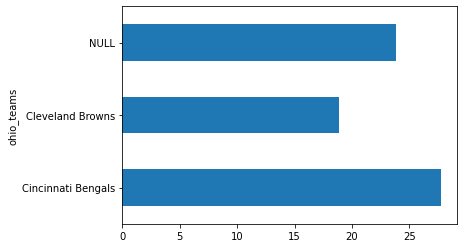

In [20]:
games_2021s.groupby('ohio_teams').score_home.mean().plot.barh()